<a href="https://colab.research.google.com/github/tools-only/fastai/blob/master/lesson2_SGD_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 2 SGD part


In [0]:
%matplotlib inline
from fastai import *
import torch
import numpy as np
import matplotlib.pyplot as plt

## 线性回归
生成数据集(线性)

In [0]:
n = 100

数据部分：x
uniform_函数解释，加了下划线的uniform表示，不返回结果，而是直接替换

In [8]:
x = torch.ones(n, 2)
x[:,0].uniform_(-1., 1)
x[:5]

tensor([[ 0.2435,  1.0000],
        [-0.7886,  1.0000],
        [-0.3765,  1.0000],
        [-0.4022,  1.0000],
        [-0.9076,  1.0000]])

参数部分：a

In [9]:
a = torch.tensor([3., 2]);a

tensor([3., 2.])

x@a的@在python中表示矩阵乘

In [0]:
y = x @ a + torch.rand(n)

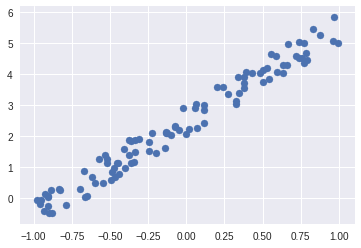

In [11]:
plt.scatter(x[:, 0], y)

构造均方误差函数

In [0]:
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

假设我们认为`a = (-1.0, 1.0)`，则可以计算出对应的损失函数

In [0]:
a = torch.tensor([-1.0, 1.0])

In [14]:
y_hat = x @ a
mse(y_hat, y)

tensor(6.8242)

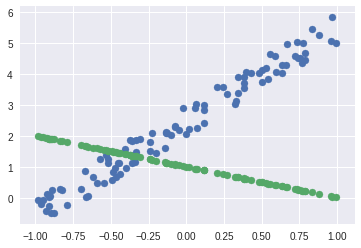

In [15]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

## Gradient Descent

In [17]:
a = torch.nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x @ a
  loss = mse(y, y_hat)
  if t % 10 == 0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad) # a = a - lr * a.grad
    a.grad.zero_()

In [19]:
lr = 1e-1
for t in range(100):
  update()

tensor(6.8242, grad_fn=<MeanBackward1>)
tensor(1.5225, grad_fn=<MeanBackward1>)
tensor(0.4659, grad_fn=<MeanBackward1>)
tensor(0.1925, grad_fn=<MeanBackward1>)
tensor(0.1208, grad_fn=<MeanBackward1>)
tensor(0.1020, grad_fn=<MeanBackward1>)
tensor(0.0971, grad_fn=<MeanBackward1>)
tensor(0.0958, grad_fn=<MeanBackward1>)
tensor(0.0955, grad_fn=<MeanBackward1>)
tensor(0.0954, grad_fn=<MeanBackward1>)


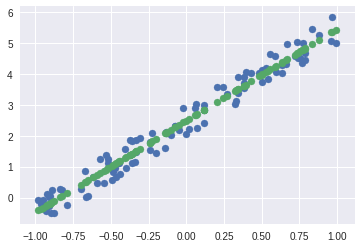

In [28]:
 plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], (x @ a).detach().numpy())

## Animate

In [0]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [0]:
! sudo add-apt-repository ppa:mc3man/trusty-media
! sudo apt-get update
! sudo apt-get install ffmpeg
! sudo apt-get install frei0r-plungins

In [48]:
a = torch.nn.Parameter(torch.tensor([-1., 1]))

fig = plt.figure()
plt.scatter(x[:, 0], y, c='orange')

line, = plt.plot(x[:, 0].detach().numpy(), (x @ a).detach().numpy())
plt.close()

def animate(i):
  update()
  line.set_ydata((x @ a).detach().numpy())
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)